## Lab 8: KOH1: Podstawowa sieć Kohonena (2 tygodnie, 2 punkty)
Zaimplementować sieć Kohonena złożoną z neuronów w prostokątnej siatce $M×N$ (M,N są parametrami programu), która działa dla zbioru wektorów (wszystkich o tej samej długości).

Zaimplementować następujące funkcje sąsiedztwa:
- funkcję gaussowską
- minus druga pochodną funkcji gaussowskiej.

W obu implementacjach dodać możliwość zmiany szerokości sąsiedztwa z użyciem parametru (technicznie oznacza to przemnożenie argumentu x przez stałą) i sprawdzić dla kilku wartości z przedziału $[0.1, 1]$.

Jako funkcji wygaszającą uczenie wraz z kolejnymi iteracjami użyć funkcji $ \alpha (t) = e^{-\frac{t}{\lambda}} $.

Przetestować działanie sieci na dostarczonych prostych zbiorach danych:
- danych 2d skupionych w wierzchołkach sześciokąta,
- danych 3d skupionych w wierzchołkach sześcianu.

Dane, odpowiednio hexagon i cube, mają 3/4 kolumny. Do sieci podać tylko kolumny x, y i z (w przypadku
sześciokąta bez z). Ostatnia kolumna, c, zawiera identyfikator wierzchołka bryły/figury. 

Czy klastry w odwzorowaniu znalezionym przez sieć pokrywają się w liczbą klastrów w faktycznych danych? 

Czy znalezione klastry pokrywają się z identyfikatorami wierzchołków?

## TODO:
- ~~implement rectangle Kohonen network~~
- ~~implement hexagon Kohonen network~~
- ~~implement gaussian neighborhood function~~
- ~~implement minus gaussian neighborhood second derivative function~~
- ~~implement decreasing learning rate~~
- ~~test clustering on simple 2d data~~
- ~~test clustering on simple 3d data~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SelfOrganizingMap as SOM

## Dataset 1: 2d simple data

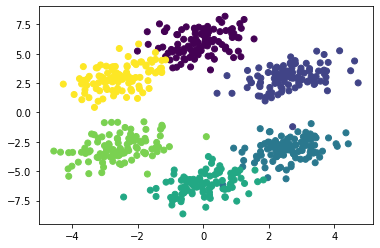

          x         y  c
0  2.402047  3.728695  1
1 -0.660032  7.047206  0
2  2.202839 -2.394303  2
3  3.179183  2.593885  1
4  3.173320 -2.152688  2


In [2]:
df_train = pd.read_csv('data/hexagon.csv')
plt.scatter(df_train['x'], df_train['y'], c=df_train['c'])
plt.show()
print(df_train.head())


x_train = df_train[["x","y"]].to_numpy()
y_train = df_train[["c"]].to_numpy()

### Map elements: squares

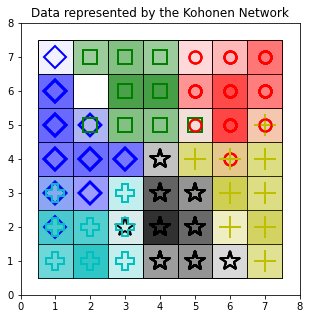

In [3]:
som = SOM.SelfOrganizingMap(7,7,2, hexagonal_map=False)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.5, learning_rate=0.3)
som.plot_map(data=x_train, classes=y_train)

### Map elements: hexagons

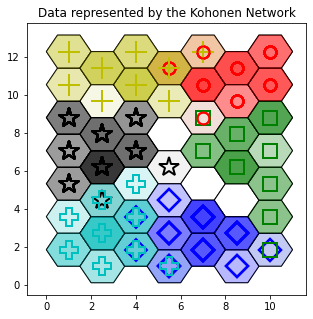

In [4]:
som = SOM.SelfOrganizingMap(7,7,2, hexagonal_map=True)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.5, learning_rate=0.3)
som.plot_map(data=x_train, classes=y_train)

## Dataset 2: 3d simple data

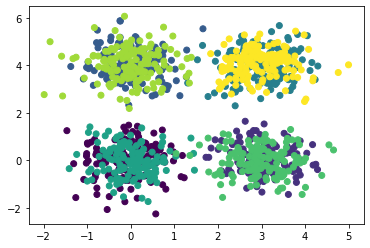

          x         y         z  c
0  0.187781  0.239537  0.382492  0
1 -1.308979 -0.143321 -0.966648  0
2 -0.987613  0.679918 -0.037552  0
3  0.924980  0.607235 -0.146856  0
4 -0.098663  0.004329 -0.588876  0


In [3]:
df_train = pd.read_csv('data/cube.csv')
plt.scatter(df_train['x'], df_train['y'], c=df_train['c'])
plt.show()
print(df_train.head())


x_train = df_train[["x","y","z"]].to_numpy()
y_train = df_train[["c"]].to_numpy()

### Map elements: squares

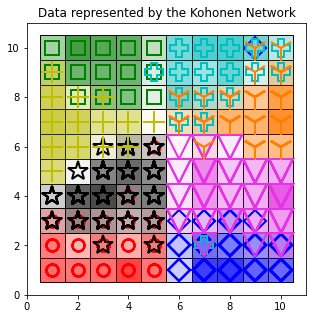

In [7]:
som = SOM.SelfOrganizingMap(10,10,3, hexagonal_map=False)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.1, learning_rate=0.3)
som.plot_map(data=x_train, classes=y_train)

### Map elements: hexagons

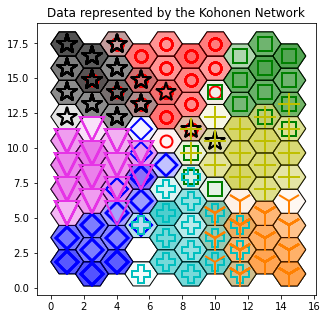

In [6]:
som = SOM.SelfOrganizingMap(10,10,3, hexagonal_map=True)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.1, learning_rate=0.3)
som.plot_map(data=x_train, classes=y_train)